TRAFIC FORECAST USING TIME SERIES ANALYSIS

The dataset contains information about the date, time and an attribute count which denotes the number of vehicles passing through a given area at that particular time. The objective behind this project is to predict the trend in traffic in that particular area at any given time or date based on the 'count' of previous years.We also try to use various different functions and other algorithms to predict the trend in the dataset.

IMPORTING NECESSARY PACKAGES

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

LOADING DATASET

In [ ]:
df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [ ]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [ ]:
np.shape(df)

(18288, 3)

PREPROCESSING

In [ ]:
df.dropna(how='any')

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [ ]:
np.max(df['Count'])

1244

In [ ]:
np.min(df['Count'])

2

In [ ]:
x=df['Count']
x.values

array([  8,   2,   6, ..., 702, 580, 534])

In [ ]:
x.dtype

dtype('int64')

In [ ]:
df['High_Traffic']=(x>500)

In [ ]:
df['High_Traffic']

0        False
1        False
2        False
3        False
4        False
         ...  
18283     True
18284     True
18285     True
18286     True
18287     True
Name: High_Traffic, Length: 18288, dtype: bool

In [ ]:
df['Low_Traffic']=(x<500)

In [ ]:
df['Low_Traffic']

0         True
1         True
2         True
3         True
4         True
         ...  
18283    False
18284    False
18285    False
18286    False
18287    False
Name: Low_Traffic, Length: 18288, dtype: bool

In [ ]:
df

,ID,Datetime,Count,High_Traffic,Low_Traffic
0,0,25-08-2012 00:00,8,False,True
1,1,25-08-2012 01:00,2,False,True
2,2,25-08-2012 02:00,6,False,True
3,3,25-08-2012 03:00,2,False,True
4,4,25-08-2012 04:00,2,False,True
...,...,...,...,...,...
18283,18283,25-09-2014 19:00,868,True,False
18284,18284,25-09-2014 20:00,732,True,False
18285,18285,25-09-2014 21:00,702,True,False
18286,18286,25-09-2014 22:00,580,True,False


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            18288 non-null  int64         
 1   Datetime      18288 non-null  datetime64[ns]
 2   Count         18288 non-null  int64         
 3   High_Traffic  18288 non-null  bool          
 4   Low_Traffic   18288 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(2)
memory usage: 464.5 KB


In [ ]:
df.index=df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,High_Traffic,Low_Traffic,y
Datetime,,,
2012-08-25,0,24,76
2012-08-26,0,24,88
2012-08-27,0,24,62
2012-08-28,0,24,58
2012-08-29,0,24,60


In [ ]:
train, test=df[df['High_Traffic']==True], df[df["High_Traffic"]==False]

In [ ]:
len(train)

12

In [ ]:
len(test)

677

In [ ]:
features=df.columns[:2]

In [ ]:
y=pd.factorize(train['High_Traffic'])[0]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
clf=RandomForestClassifier(n_jobs=2,random_state=0)

In [ ]:
clf.fit(train[features],y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df['ds'] = df.index
df.head()

,High_Traffic,Low_Traffic,y,ds
Datetime,,,,
2012-08-25,0,24,76,2012-08-25
2012-08-26,0,24,88,2012-08-26
2012-08-27,0,24,62,2012-08-27
2012-08-28,0,24,58,2012-08-28
2012-08-29,0,24,60,2012-08-29


VISUALIZING TREND BETWEEN DT AND VC

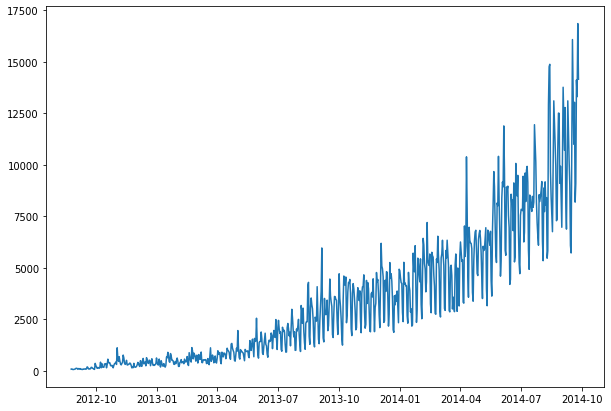

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df['ds'], df['y'])
plt.show()

In [ ]:
df.drop(columns=['High_Traffic','Low_Traffic'], axis=1, inplace=True)

In [ ]:
size = 100
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)
train.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


In [ ]:
test.head()

,y,ds
Datetime,,
2014-06-18,8300,2014-06-18
2014-06-19,6802,2014-06-19
2014-06-20,9118,2014-06-20
2014-06-21,5282,2014-06-21
2014-06-22,5540,2014-06-22


In [ ]:
test.tail()

,y,ds
Datetime,,
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23
2014-09-24,16856,2014-09-24
2014-09-25,14152,2014-09-25


In [ ]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
f_data = model.make_future_dataframe(periods=100)
f_data

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [ ]:
forecast = model.predict(f_data)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-509.515681,-1678.206217,128.513741,-509.515681,-509.515681,-272.470704,-272.470704,-272.470704,-786.127881,-786.127881,-786.127881,513.657176,513.657176,513.657176,0.0,0.0,0.0,-781.986385
1,2012-08-26,-502.314109,-1779.917206,-7.239647,-502.314109,-502.314109,-388.737957,-388.737957,-388.737957,-902.932915,-902.932915,-902.932915,514.194958,514.194958,514.194958,0.0,0.0,0.0,-891.052066
2,2012-08-27,-495.112537,-511.329840,1254.376074,-495.112537,-495.112537,885.905234,885.905234,885.905234,372.157378,372.157378,372.157378,513.747856,513.747856,513.747856,0.0,0.0,0.0,390.792697
3,2012-08-28,-487.910965,-439.984221,1325.336234,-487.910965,-487.910965,930.865597,930.865597,930.865597,418.330932,418.330932,418.330932,512.534665,512.534665,512.534665,0.0,0.0,0.0,442.954632
4,2012-08-29,-480.709393,-555.994768,1266.673604,-480.709393,-480.709393,882.438286,882.438286,882.438286,371.679601,371.679601,371.679601,510.758685,510.758685,510.758685,0.0,0.0,0.0,401.728894


100

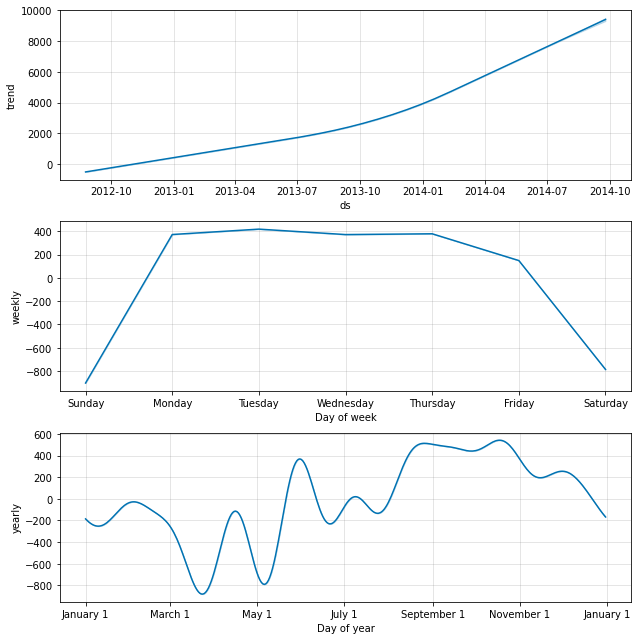

In [ ]:
model.plot_components(forecast)
pred = forecast.iloc[-100:, :]
len(pred)

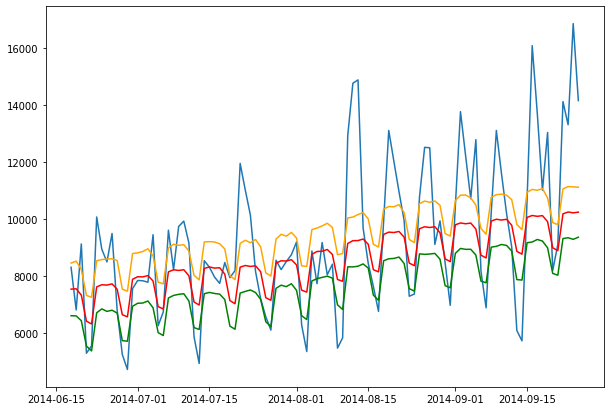

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

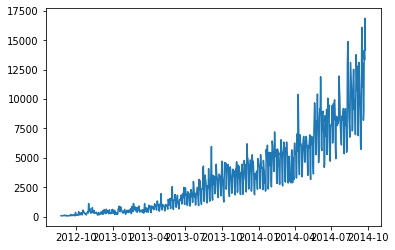

In [ ]:
plt.plot(df['ds'], df['y'])
plt.show()

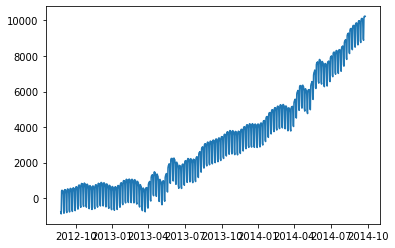

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [ ]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-691.413088,-2319.802076,55.257302,-691.413088,-691.413088,-423.432144,-423.432144,-423.432144,-995.120367,-995.120367,-995.120367,571.688223,571.688223,571.688223,0.0,0.0,0.0,-1114.845232
1,2012-08-26,-683.288701,-2393.217788,-156.233315,-683.288701,-683.288701,-581.426591,-581.426591,-581.426591,-1144.187184,-1144.187184,-1144.187184,562.760593,562.760593,562.760593,0.0,0.0,0.0,-1264.715292
2,2012-08-27,-675.164314,-819.946314,1522.547687,-675.164314,-675.164314,1008.545650,1008.545650,1008.545650,457.575538,457.575538,457.575538,550.970112,550.970112,550.970112,0.0,0.0,0.0,333.381336
3,2012-08-28,-667.039926,-677.234063,1682.382318,-667.039926,-667.039926,1145.477035,1145.477035,1145.477035,608.350482,608.350482,608.350482,537.126553,537.126553,537.126553,0.0,0.0,0.0,478.437108
4,2012-08-29,-658.915539,-755.577520,1588.607961,-658.915539,-658.915539,1078.945696,1078.945696,1078.945696,556.887062,556.887062,556.887062,522.058634,522.058634,522.058634,0.0,0.0,0.0,420.030157


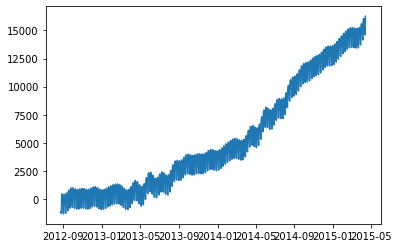

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()